In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [140]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [141]:
df=pd.read_csv('Housing.csv')

In [142]:
df.shape

(545, 13)

In [143]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [144]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [145]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [146]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


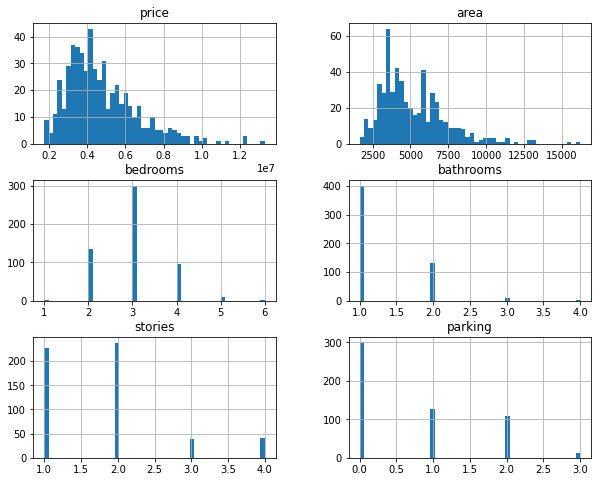

In [148]:
df.hist(bins=50, figsize=(10, 8))
plt.show()

In [149]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

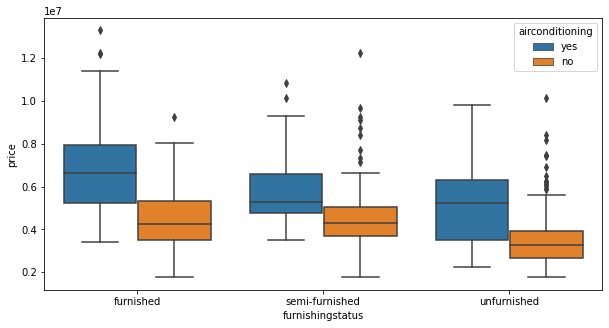

In [150]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

In [151]:
df.replace(('yes', 'no'), (1, 0), inplace=True)

In [152]:
df.furnishingstatus.replace(('furnished', 'semi-furnished', 'unfurnished'), (3,4,5), inplace=True)

In [153]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,4
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3


In [154]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


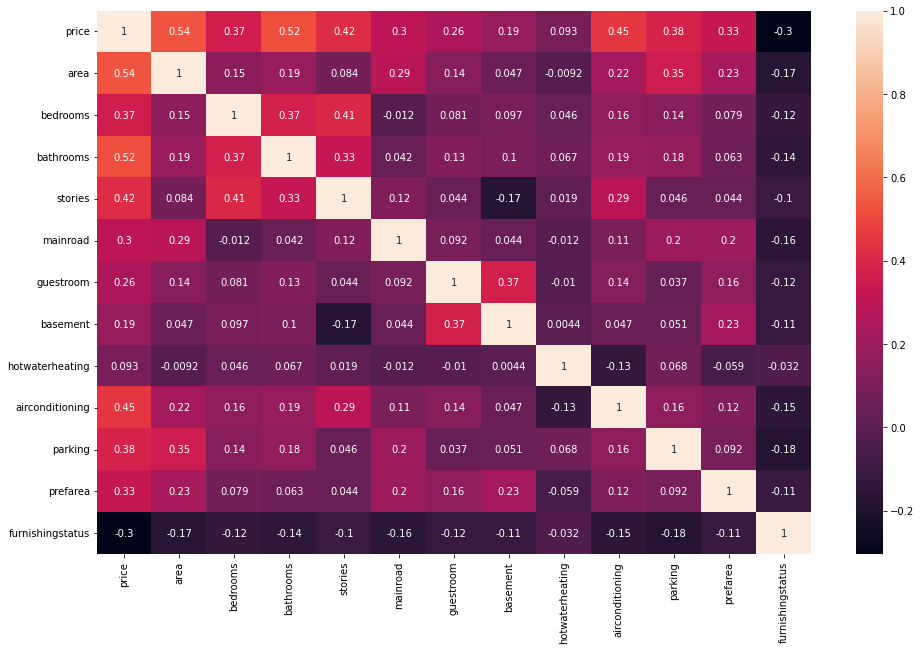

In [155]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

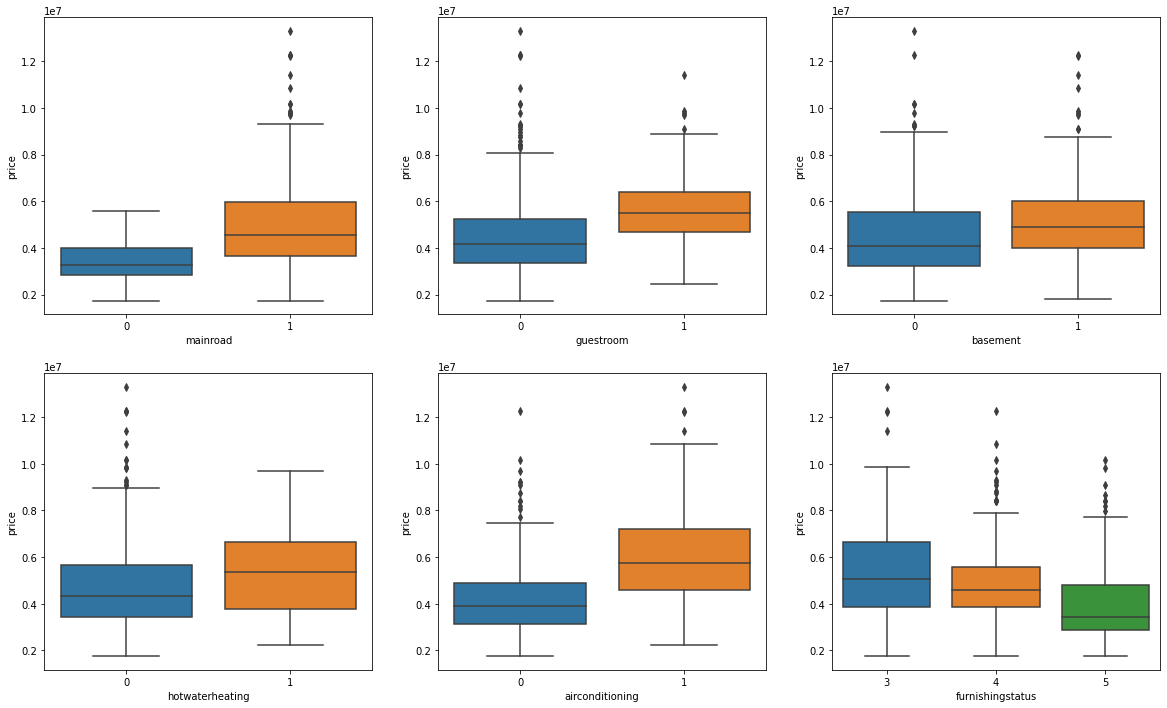

In [156]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

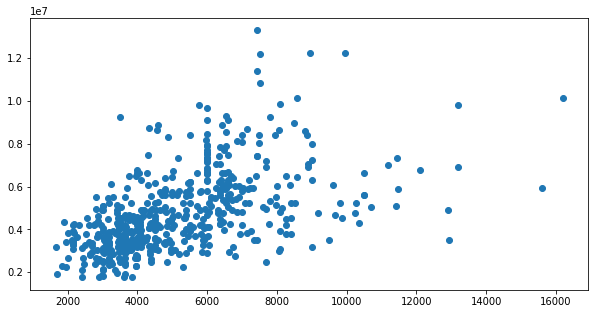

In [157]:
plt.figure(figsize = (10, 5))
plt.scatter(df['area'],df['price'])

In [158]:
y = df.pop('price')
x = df

In [159]:
model = LinearRegression()

In [160]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [161]:
x_train.shape

(436, 12)

In [162]:
y_train.shape

(436,)

In [163]:
x_test.shape

(109, 12)

In [164]:
y_test.shape

(109,)

In [165]:
scaler = MinMaxScaler()

In [166]:
model.fit(x_train, y_train)

LinearRegression()

In [167]:
model.score(x_test, y_test)

0.6361990100766217

In [168]:
model.coef_

array([ 2.47065632e+02,  6.28684394e+04,  9.56921653e+05,  4.50768846e+05,
        3.85208365e+05,  3.47165368e+05,  4.00250356e+05,  8.19777718e+05,
        8.55146057e+05,  2.74140242e+05,  7.03590958e+05, -2.74547937e+05])

In [169]:
y_pred = model.predict(x_test)

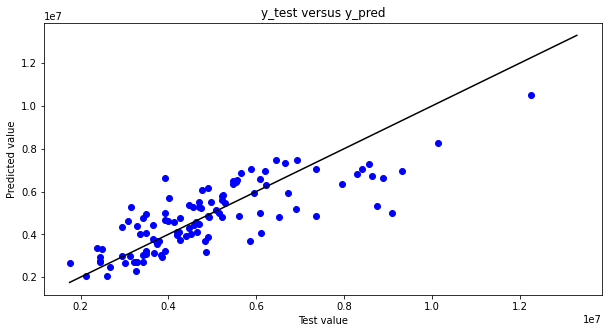

In [170]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test,y_pred, c='blue')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Test value')                         
plt.ylabel('Predicted value') 
plt.show()

In [171]:
per_error = 100*(y_pred-y_test)/y_test

df_prd_tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})

df_prd_tst

,Predicted Price,Actual Price,% Error
333,3236960,3920000,-17.424480
84,4792788,6510000,-26.378057
439,2293337,3255000,-29.544153
396,3155585,3500000,-9.840419
161,6359535,5460000,16.475001
...,...,...,...
100,6316988,6230000,1.396290
344,2933328,3850000,-23.809640
176,5827968,5250000,11.008920
244,5261159,4550000,15.629875


In [172]:
abs(per_error).max()

69.3876827222124

In [173]:
abs(per_error).min()

0.2581685657288347

In [174]:
abs(per_error).mean()

17.8695208860673

In [175]:
mean_squared_error(y_test, y_pred, squared = False)

1136290.9401069537

In [176]:
r2_score(y_test, y_pred)

0.6361990100766217